Dynamics of a single particle in free space is the simplest kind of simulation. It allows to check basic functionality of the program, and, besides, it is a good way to become familiar with how the program works.

In absence of external forces, a body moves in straight line with constant velocity

\begin{align}
& \textbf{r}(t) = \textbf{r}_0 + \textbf{v}_0 t
\\
& \textbf{v}(t) = \textbf{v}_0
\end{align}

To get some sense of scales (see below), suppose the particle is an electron that has just passed an 1 keV accelerating potential difference. Its mass `m` and charge `q` are `q = 4.8e-10 [cgs], m = 9.1e-28 [g]`. Since its energy is nonrelativistic, it's possible to calculate its speed simply as $v = \sqrt{ 2 E / m } = 1.808e+09 ~ [cm/s]$. To cover a `10 [cm]` distance with such speed, it will take the electron `t = 5.530e-09 [s] ~ 6 [ns]`.

In [1]:
#estimates

from math import *

m = 9.8e-28
q = 4.8e-10
print("q = {:.3e} [cgs]".format(q))
print("m = {:.3e} [g]".format(m))

ev_to_cgs = 1.60218e-12
E = 1000 * ev_to_cgs
v = sqrt(2 * E / m)
print("E = {:.3e} [eV] = {:.3e} [erg]".format(E / ev_to_cgs, E))
print("v = {:.3e} [cm/s]".format(v))
print("p = {:.3e} [g * cm/s]".format(v * m))

z_distance = 10
t = z_distance / v
print("z_distance = {:f} [cm]".format(z_distance))
print("t = {:.3e} [s]".format(t))

sim_time = 6.0e-9
n_of_steps = 1000
dt = sim_time / n_of_steps
print("simulation_time = {:.3e} [s]".format(sim_time))
print("number_of_time_steps = {:d}".format(n_of_steps))
print("time_step_size = {:.3e} [s]".format(dt))


q = 4.800e-10 [cgs]
m = 9.800e-28 [g]
E = 1.000e+03 [eV] = 1.602e-09 [erg]
v = 1.808e+09 [cm/s]
p = 1.772e-18 [g * cm/s]
z_distance = 10.000000 [cm]
t = 5.530e-09 [s]
simulation_time = 6.000e-09 [s]
number_of_time_steps = 1000
time_step_size = 6.000e-12 [s]


In [2]:
from math import *

m = 9.8e-28
q = 4.8e-10
print( "q = {:.3e} [cgs]".format( q ) )
print( "m = {:.3e} [g]".format( m ) )

ev_to_cgs = 1.60218e-12
E = 1000 * ev_to_cgs
v = sqrt( 2 * E / m )
z = 10
t = z / v
print( "E = {:.3e} [eV] = {:.3e} [erg]".format( E / ev_to_cgs, E ) )
print( "v = {:.3e} [cm/s]; p = {:.3e} [g * cm/s]".format( v, v * m ) )
print( "z = {:.3e} [cm]".format( z ) )
print( "t = {:.3e} [s]".format( t ) )

q = 4.800e-10 [cgs]
m = 9.800e-28 [g]
E = 1.000e+03 [eV] = 1.602e-09 [erg]
v = 1.808e+09 [cm/s]; p = 1.772e-18 [g * cm/s]
z = 1.000e+01 [cm]
t = 5.530e-09 [s]


To perform a simulation, it's necessary to prepare a config file. It is an `ini`-file with sections describing the simulation parameters, e.g.:

```
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-12
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
...
```
If Ef is invoked from the command line, this file is passed as an argument:

```
ef conf.ini
```

The list of supported config sections can be found in the wiki: https://github.com/epicf/ef/wiki/Supported-Config-File-Sections .

Config classes can be used to create, visualize and read/write to ini the config file with python or jupyter.

In [3]:
from ef.config.components import *
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
Visualizer3d()


First, it's necessary to set a total time of the simulation and a time step.
Let's use the estimates above as guiding values and set the total time to `6e-9 [s]`.
We use `1000` time steps, so that `time_step_size = 6.0e-12 [s]`. 
Besides, it's necessary to decide at which time steps the state of the whole simulation should be saved to the disk.
To save each tenth step, `time_save_step` is set equal to 10x of `time_step_size`: `time_save_step = 6.0e-11`.

In [4]:
single_particle_in_free_space_conf = ""

time_grid_sec = """
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + time_grid_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12



In [5]:
timegrid = TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
print(repr(timegrid))
print(timegrid)

TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
### TimeGridConf:
total = 6e-09
save_step = 6e-11
step = 6e-12


Next we need to define size of a computational volume.
Domain size is set to 15 [cm] along the z-axis and 5 [cm] along the x- and y-axes. 
The parameters for PIC-mesh are also defined in this section.
Since we are going to use noninteracting particle model instead of PIC, they are not used and can be set arbitrary. 

In [6]:
spat_mesh_sec = """
[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + spat_mesh_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5



SpatialMeshConf(size=array([ 5.,  5., 15.]), step=array([0.5, 0.5, 1.5]))
### SpatialMeshConf:
size = array([ 5.,  5., 15.])
step = array([0.5, 0.5, 1.5])


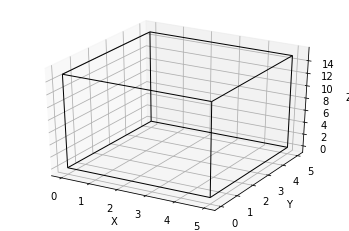

In [7]:
mesh = SpatialMeshConf((5, 5, 15), (.5, .5, 1.5))
print(repr(mesh))
print(mesh)
Visualizer3d().visualize([mesh])


Next, a particle source. 
We need a single particle at startup ( `initial_number_of_particles = 1` ), approximately 1 [mm] away from
coordinate axis origin at the bottom-left-near corner of the domain (`shape = Box( origin = (0.1, ...` below and `box_x_left = 0.10 ...` in the ini-version).
Charge and mass are set to those of the electron.
Momentum corresponding to 1 keV energy is `1.772e-18 [g * cm / s]`.
Such value is set for momentum along the z-axis. 
Momenta along the x- and y-axes could be set to zero; instead they are chosen 3 times smaller than the z-axis momentum
(domain size along the x and y is 3 times smaller than along the z). 
To prevent any variation in momentum, the `temperature` is set to 0.
Notice that the source is given a descriptive name: `emit_single_particle` in this case.

In [8]:
emit_single_particle_sec = """
[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + emit_single_particle_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28



ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([6.00e-19, 6.00e-19, 1.77e-18]), temperature=0.0, charge=4.8e-10, mass=9.8e-28)
### ParticleSourceConf:
name = 'emit_single_particle'
shape = Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01]))
initial_particles = 1
particles_to_generate_each_step = 0
momentum = array([6.00e-19, 6.00e-19, 1.77e-18])
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28


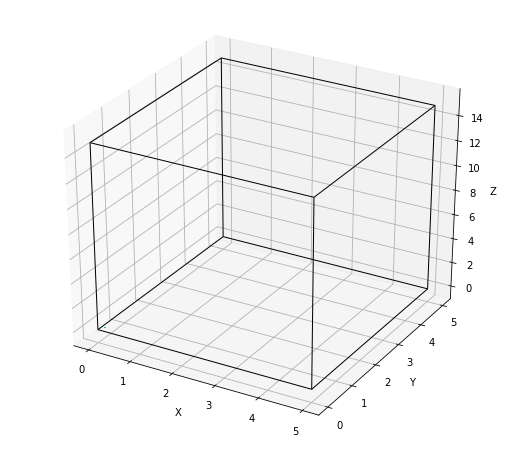

In [9]:
source = ParticleSourceConf("emit_single_particle", Box((.1, .1, .1), (.01, .01, .01)), 1, 0,
                           (6e-19, 6e-19, 1.77e-18), 0., 4.8e-10, 9.8e-28)
print(repr(source))
print(source)
Visualizer3d().visualize([mesh, source]) # small dot near (0, 0, 0) because mesh is so big

Next section is boundary conditions. 
In a free space, potentials on each boundary should be equal. 
It is possible to simply set them to zero.

In [10]:
boundary_sec = """
[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + boundary_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0



In [11]:
boundary_conditions = BoundaryConditionsConf(0)
print(repr(boundary_conditions))
print(boundary_conditions)

BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
### BoundaryConditionsConf:
right = 0.0
left = 0.0
bottom = 0.0
top = 0.0
near = 0.0
far = 0.0


Particle interaction model allows to choose between noninteracting particles, particle interacting with binary forces and PIC method. Since there is only one particle, there is no need to use PIC, and noninteracting mode is enough. Moreover, PIC will lead to wrong results (because particle creates electric field that acts back on the particle). 

In [12]:
particle_interaction_model_sec = """
[ParticleInteractionModel]
particle_interaction_model = noninteracting
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + particle_interaction_model_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[ParticleInteractionModel]
particle_interaction_model = noninteracting



In [13]:
model = ParticleInteractionModelConf('noninteracting')
print(repr(model))
print(model)

ParticleInteractionModelConf(model='noninteracting')
### ParticleInteractionModelConf:
model = 'noninteracting'


The last step is to specify pattern for output file names. 
They will be of the form `single_particle_free_space_0001000.h5`, where `0001000` is a time step number.

In [14]:
output_sec = """
[OutputFilename]
output_filename_prefix = single_particle_free_space_
output_filename_suffix = .h5
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + output_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[ParticleInteractionModel]
particle_interaction_model = noninteracting

[OutputFilename]
output_filename_prefix = single_particle_free_space_
output_filename_suffix = .h5



To start the simulation, the config should saved into file and provided as an argument to the `ef.out`, e.g.:

```
ef.out ./single_particle_in_free_space_conf.ini
```

EfJupyter module provides a wrapper `EfRunner` to do this.  

In [15]:
file_conf = OutputFileConf('single_particle_free_space_', '.h5')
print(repr(file_conf))
print(file_conf)

OutputFileConf(prefix='single_particle_free_space_', suffix='.h5', format_='cpp')
### OutputFileConf:
prefix = 'single_particle_free_space_'
suffix = '.h5'
format_ = 'cpp'


You can check that config objects describe the same simulation:

### Config:
time_grid = TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
spatial_mesh = SpatialMeshConf(size=array([ 5.,  5., 15.]), step=array([0.5, 0.5, 1.5]))
sources = [ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([6.00e-19, 6.00e-19, 1.77e-18]), temperature=0.0, charge=4.8e-10, mass=9.8e-28)]
inner_regions = []
output_file = OutputFileConf(prefix='single_particle_free_space_', suffix='.h5', format_='cpp')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='noninteracting')
external_fields = []
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emi

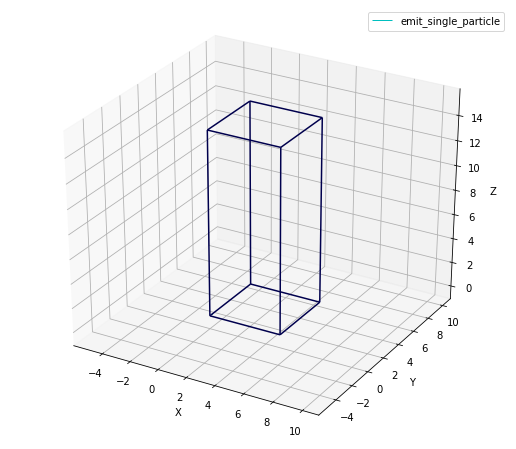

In [16]:
conf = Config(timegrid, mesh, [source], [], file_conf, boundary_conditions, model)
print(conf)
print(conf.export_to_string())
conf.visualize_all(Visualizer3d())

To run outside Jupyter just save the config file

-  with any text editor
-  or with `efconf.export_to_file()`

Run `ef config.ini` in the directory where you want simulation to run and save results.

To run in python from Jupyter:

In [17]:
from ef.runner import Runner
# if you start from .ini
# conf = Config.from_fname('config.ini')
sim = conf.make()
Runner(sim, output_writer=conf.output_file.make()).start()


Writing initial fields to file
Writing to file single_particle_free_space_fieldsWithoutParticles_new.h5
Writing to file single_particle_free_space_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file single_particle_free_space_0000000.h5
Time step from 0 to 1 of 1000
Time step from 1 to 2 of 1000
Time step from 2 to 3 of 1000
Time step from 3 to 4 of 1000
Time step from 4 to 5 of 1000
Time step from 5 to 6 of 1000
Time step from 6 to 7 of 1000
Time step from 7 to 8 of 1000
Time step from 8 to 9 of 1000
Time step from 9 to 10 of 1000
Writing step 10 to file
Writing to file single_particle_free_space_0000010.h5
Time step from 10 to 11 of 1000
Time step from 11 to 12 of 1000
Time step from 12 to 13 of 1000
Time step from 13 to 14 of 1000
Time step from 14 to 15 of 1000
Time step from 15 to 16 of 1000
Time step from 16 to 17 of 1000
Time step from 17 to 18 of 1000
Time step from 18 to 19 of 1000
Time step from 19 to 20 of 1000
Writing step 20 to file
Writing to file single_part

Time step from 220 to 221 of 1000
Time step from 221 to 222 of 1000
Time step from 222 to 223 of 1000
Time step from 223 to 224 of 1000
Time step from 224 to 225 of 1000
Time step from 225 to 226 of 1000
Time step from 226 to 227 of 1000
Time step from 227 to 228 of 1000
Time step from 228 to 229 of 1000
Time step from 229 to 230 of 1000
Writing step 230 to file
Writing to file single_particle_free_space_0000230.h5
Time step from 230 to 231 of 1000
Time step from 231 to 232 of 1000
Time step from 232 to 233 of 1000
Time step from 233 to 234 of 1000
Time step from 234 to 235 of 1000
Time step from 235 to 236 of 1000
Time step from 236 to 237 of 1000
Time step from 237 to 238 of 1000
Time step from 238 to 239 of 1000
Time step from 239 to 240 of 1000
Writing step 240 to file
Writing to file single_particle_free_space_0000240.h5
Time step from 240 to 241 of 1000
Time step from 241 to 242 of 1000
Time step from 242 to 243 of 1000
Time step from 243 to 244 of 1000
Time step from 244 to 245 

Time step from 470 to 471 of 1000
Time step from 471 to 472 of 1000
Time step from 472 to 473 of 1000
Time step from 473 to 474 of 1000
Time step from 474 to 475 of 1000
Time step from 475 to 476 of 1000
Time step from 476 to 477 of 1000
Time step from 477 to 478 of 1000
Time step from 478 to 479 of 1000
Time step from 479 to 480 of 1000
Writing step 480 to file
Writing to file single_particle_free_space_0000480.h5
Time step from 480 to 481 of 1000
Time step from 481 to 482 of 1000
Time step from 482 to 483 of 1000
Time step from 483 to 484 of 1000
Time step from 484 to 485 of 1000
Time step from 485 to 486 of 1000
Time step from 486 to 487 of 1000
Time step from 487 to 488 of 1000
Time step from 488 to 489 of 1000
Time step from 489 to 490 of 1000
Writing step 490 to file
Writing to file single_particle_free_space_0000490.h5
Time step from 490 to 491 of 1000
Time step from 491 to 492 of 1000
Time step from 492 to 493 of 1000
Time step from 493 to 494 of 1000
Time step from 494 to 495 

Time step from 720 to 721 of 1000
Time step from 721 to 722 of 1000
Time step from 722 to 723 of 1000
Time step from 723 to 724 of 1000
Time step from 724 to 725 of 1000
Time step from 725 to 726 of 1000
Time step from 726 to 727 of 1000
Time step from 727 to 728 of 1000
Time step from 728 to 729 of 1000
Time step from 729 to 730 of 1000
Writing step 730 to file
Writing to file single_particle_free_space_0000730.h5
Time step from 730 to 731 of 1000
Time step from 731 to 732 of 1000
Time step from 732 to 733 of 1000
Time step from 733 to 734 of 1000
Time step from 734 to 735 of 1000
Time step from 735 to 736 of 1000
Time step from 736 to 737 of 1000
Time step from 737 to 738 of 1000
Time step from 738 to 739 of 1000
Time step from 739 to 740 of 1000
Writing step 740 to file
Writing to file single_particle_free_space_0000740.h5
Time step from 740 to 741 of 1000
Time step from 741 to 742 of 1000
Time step from 742 to 743 of 1000
Time step from 743 to 744 of 1000
Time step from 744 to 745 

Time step from 970 to 971 of 1000
Time step from 971 to 972 of 1000
Time step from 972 to 973 of 1000
Time step from 973 to 974 of 1000
Time step from 974 to 975 of 1000
Time step from 975 to 976 of 1000
Time step from 976 to 977 of 1000
Time step from 977 to 978 of 1000
Time step from 978 to 979 of 1000
Time step from 979 to 980 of 1000
Writing step 980 to file
Writing to file single_particle_free_space_0000980.h5
Time step from 980 to 981 of 1000
Time step from 981 to 982 of 1000
Time step from 982 to 983 of 1000
Time step from 983 to 984 of 1000
Time step from 984 to 985 of 1000
Time step from 985 to 986 of 1000
Time step from 986 to 987 of 1000
Time step from 987 to 988 of 1000
Time step from 988 to 989 of 1000
Time step from 989 to 990 of 1000
Writing step 990 to file
Writing to file single_particle_free_space_0000990.h5
Time step from 990 to 991 of 1000
Time step from 991 to 992 of 1000
Time step from 992 to 993 of 1000
Time step from 993 to 994 of 1000
Time step from 994 to 995 

To run outside python (for example, C++ ef):

In [18]:
conf.export_to_fname('config.ini')

In [19]:
!ef config.ini --output-format python

Trying to guess input file type: config.ini
### Config:
time_grid = TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
spatial_mesh = SpatialMeshConf(size=array([ 5.,  5., 15.]), step=array([0.5, 0.5, 1.5]))
sources = [ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([6.00e-19, 6.00e-19, 1.77e-18]), temperature=0.0, charge=4.8e-10, mass=9.8e-28)]
inner_regions = []
output_file = OutputFileConf(prefix='single_particle_free_space_', suffix='.h5', format_='python')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='noninteracting')
external_fields = []
Writing initial fields to file
Writing to file single_particle_free_space_fieldsWithoutParticles_new.h5
Writing to file single_particle_free_space_fieldsWithoutParticles.h5
Wri

Time step from 220 to 221 of 1000
Time step from 221 to 222 of 1000
Time step from 222 to 223 of 1000
Time step from 223 to 224 of 1000
Time step from 224 to 225 of 1000
Time step from 225 to 226 of 1000
Time step from 226 to 227 of 1000
Time step from 227 to 228 of 1000
Time step from 228 to 229 of 1000
Time step from 229 to 230 of 1000
Writing step 230 to file
Writing to file single_particle_free_space_0000230.h5
Time step from 230 to 231 of 1000
Time step from 231 to 232 of 1000
Time step from 232 to 233 of 1000
Time step from 233 to 234 of 1000
Time step from 234 to 235 of 1000
Time step from 235 to 236 of 1000
Time step from 236 to 237 of 1000
Time step from 237 to 238 of 1000
Time step from 238 to 239 of 1000
Time step from 239 to 240 of 1000
Writing step 240 to file
Writing to file single_particle_free_space_0000240.h5
Time step from 240 to 241 of 1000
Time step from 241 to 242 of 1000
Time step from 242 to 243 of 1000
Time step from 243 to 244 of 1000
Time step from 244 to 245 

Time step from 460 to 461 of 1000
Time step from 461 to 462 of 1000
Time step from 462 to 463 of 1000
Time step from 463 to 464 of 1000
Time step from 464 to 465 of 1000
Time step from 465 to 466 of 1000
Time step from 466 to 467 of 1000
Time step from 467 to 468 of 1000
Time step from 468 to 469 of 1000
Time step from 469 to 470 of 1000
Writing step 470 to file
Writing to file single_particle_free_space_0000470.h5
Time step from 470 to 471 of 1000
Time step from 471 to 472 of 1000
Time step from 472 to 473 of 1000
Time step from 473 to 474 of 1000
Time step from 474 to 475 of 1000
Time step from 475 to 476 of 1000
Time step from 476 to 477 of 1000
Time step from 477 to 478 of 1000
Time step from 478 to 479 of 1000
Time step from 479 to 480 of 1000
Writing step 480 to file
Writing to file single_particle_free_space_0000480.h5
Time step from 480 to 481 of 1000
Time step from 481 to 482 of 1000
Time step from 482 to 483 of 1000
Time step from 483 to 484 of 1000
Time step from 484 to 485 

Time step from 709 to 710 of 1000
Writing step 710 to file
Writing to file single_particle_free_space_0000710.h5
Time step from 710 to 711 of 1000
Time step from 711 to 712 of 1000
Time step from 712 to 713 of 1000
Time step from 713 to 714 of 1000
Time step from 714 to 715 of 1000
Time step from 715 to 716 of 1000
Time step from 716 to 717 of 1000
Time step from 717 to 718 of 1000
Time step from 718 to 719 of 1000
Time step from 719 to 720 of 1000
Writing step 720 to file
Writing to file single_particle_free_space_0000720.h5
Time step from 720 to 721 of 1000
Time step from 721 to 722 of 1000
Time step from 722 to 723 of 1000
Time step from 723 to 724 of 1000
Time step from 724 to 725 of 1000
Time step from 725 to 726 of 1000
Time step from 726 to 727 of 1000
Time step from 727 to 728 of 1000
Time step from 728 to 729 of 1000
Time step from 729 to 730 of 1000
Writing step 730 to file
Writing to file single_particle_free_space_0000730.h5
Time step from 730 to 731 of 1000
Time step from 

Time step from 950 to 951 of 1000
Time step from 951 to 952 of 1000
Time step from 952 to 953 of 1000
Time step from 953 to 954 of 1000
Time step from 954 to 955 of 1000
Time step from 955 to 956 of 1000
Time step from 956 to 957 of 1000
Time step from 957 to 958 of 1000
Time step from 958 to 959 of 1000
Time step from 959 to 960 of 1000
Writing step 960 to file
Writing to file single_particle_free_space_0000960.h5
Time step from 960 to 961 of 1000
Time step from 961 to 962 of 1000
Time step from 962 to 963 of 1000
Time step from 963 to 964 of 1000
Time step from 964 to 965 of 1000
Time step from 965 to 966 of 1000
Time step from 966 to 967 of 1000
Time step from 967 to 968 of 1000
Time step from 968 to 969 of 1000
Time step from 969 to 970 of 1000
Writing step 970 to file
Writing to file single_particle_free_space_0000970.h5
Time step from 970 to 971 of 1000
Time step from 971 to 972 of 1000
Time step from 972 to 973 of 1000
Time step from 973 to 974 of 1000
Time step from 974 to 975 

After the simulation finishes, a bunch of `*.h5` files emerge in the directory.

In [20]:
!ls

config.ini
single_particle_free_space_0000000.h5
single_particle_free_space_0000010.h5
single_particle_free_space_0000020.h5
single_particle_free_space_0000030.h5
single_particle_free_space_0000040.h5
single_particle_free_space_0000050.h5
single_particle_free_space_0000060.h5
single_particle_free_space_0000070.h5
single_particle_free_space_0000080.h5
single_particle_free_space_0000090.h5
single_particle_free_space_0000100.h5
single_particle_free_space_0000110.h5
single_particle_free_space_0000120.h5
single_particle_free_space_0000130.h5
single_particle_free_space_0000140.h5
single_particle_free_space_0000150.h5
single_particle_free_space_0000160.h5
single_particle_free_space_0000170.h5
single_particle_free_space_0000180.h5
single_particle_free_space_0000190.h5
single_particle_free_space_0000200.h5
single_particle_free_space_0000210.h5
single_particle_free_space_0000220.h5
single_particle_free_space_0000230.h5
single_particle_free_space_0000240.h5
single_particle_free_space_0000250.h5
s

To open these files and glance over the results, an [Hdfview](https://support.hdfgroup.org/products/java/hdfview/) is a convenient tool.
In this simulation, two places are of interest: `current time` and particle position
and momentum at this time moment:

<p align="center">
<img src="https://github.com/epicf/ef/blob/dev/doc/figs/single_particle_in_free_space/hdfview_results.png?raw=true" alt="hdfview screenshot" width="600"/>
</p>

Each created `h5`-file corresponds to a different time step. 
If we were able to extract time, position and momentum of the particle from each file, we could have obtained numerical trajectory, which could be compared to the analytical one. 

Data extraction and plotting are accomplished by the accompanying [`plot.py`](https://github.com/epicf/ef/blob/master/examples/single_particle_in_free_space/plot.py) python script (see below). Its constituent parts are described further. The script produces a 3d plot and side views of the numerical and analytical trajectories. Besides, kinetic energies are compared.

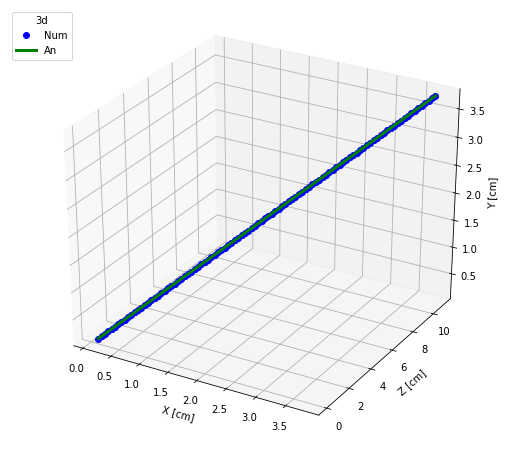

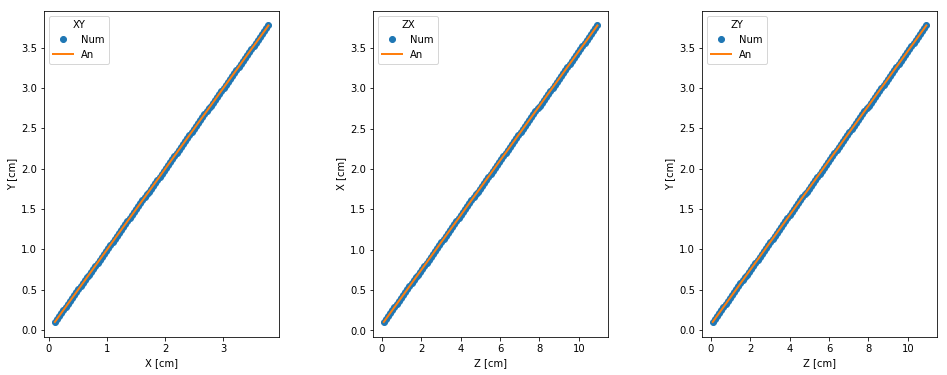

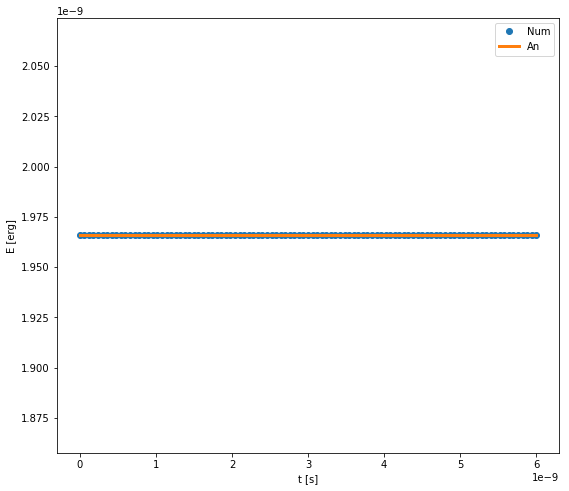

In [21]:
import pandas as pd
import  glob
import h5py
import matplotlib.pyplot as plt 

def main():
    num = extract_num_trajectory_from_out_files()
    an = eval_an_trajectory_at_num_time_points( num )
    plot_trajectories( num , an )

def extract_num_trajectory_from_out_files():
    out_files = glob.glob("single_particle_free_space_[0-9][0-9][0-9][0-9][0-9][0-9][0-9].h5")

    num_trajectory = []
    for f in out_files:
        num_trajectory.append( extract_time_pos_mom( f ) )    

    num_trajectory = sorted([ x for x in num_trajectory if x ], key = lambda x: x[0])
    return pd.DataFrame.from_records(num_trajectory, columns=('t', 'x', 'y', 'z', 'px', 'py', 'pz'))
    
def extract_time_pos_mom( h5file ):
    with h5py.File(h5file, mode="r") as h5:
        t = h5["/time_grid"].attrs["current_node"] * h5["/time_grid"].attrs["time_step_size"]
        particle_array = h5["/particle_arrays/0"]
        pos = particle_array["positions"][0]
        momentum = particle_array["momentums"][0]
    return [t] + list(pos) + list(momentum)

def eval_an_trajectory_at_num_time_points( num_trajectory ):
    global particle_mass
    particle_mass, pos0, mom0 =  get_mass_and_initial_pos_and_mom()

    an_trajectory = []
    for t in num_trajectory.t:
        pos = coords( particle_mass, t, pos0, mom0 )
        mom = momenta( t, mom0 )
        an_trajectory.append([t] + list(pos) + list(mom))

    return pd.DataFrame.from_records(an_trajectory, columns=('t', 'x', 'y', 'z', 'px', 'py', 'pz'))

def get_mass_and_initial_pos_and_mom():
    initial_out_file = "single_particle_free_space_0000000.h5"
    with h5py.File( initial_out_file, mode="r") as h5:
        particle_array = h5["/particle_arrays/0"]
        m = particle_array.attrs["mass"]
        pos0 = particle_array["positions"][0]
        mom0 = particle_array["momentums"][0]
    return m, pos0, mom0

def momenta( t, mom0 ):    
    return mom0

def coords( m, t, pos0, mom0 ):
    pos = pos0 + mom0 / m * t
    return pos

def plot_trajectories( num , an ):
    plot_3d( num, an )
    plot_2d( num, an )
    plot_kin_en( num , an )

def plot_3d( num, an ):
    fig = plt.figure()
    ax = fig.gca( projection='3d' )
    ax.plot( num.x, num.z, num.y, 'b.', markersize = 12, label = "Num" )
    ax.plot( an.x, an.z, an.y,  'g-', linewidth = 3, label = "An" )
    ax.set_xlabel('X [cm]')
    ax.set_ylabel('Z [cm]')
    ax.set_zlabel('Y [cm]')
    plt.legend( loc = 'upper left', title="3d" )
    #print( 'Saving 3d trajectory plot to "3d.png"' )
    #plt.savefig('3d.png')
    plt.show()

def plot_2d( num, an ):
    plt.figure( figsize=( 16, 6 ) )
    plt.subplots_adjust( left = None, bottom = None,
                         right = None, top = None,
                         wspace = 0.4, hspace = None )
    #XY
    ax = plt.subplot(131)
    plt.plot( num.x, num.y,
              linestyle='', marker='o',
              label = "Num" )
    plt.plot( an.x, an.y,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('X [cm]') 
    ax.set_ylabel('Y [cm]') 
    plt.legend( loc = 'upper left', title="XY" )
    #ZX
    ax = plt.subplot(132)
    plt.plot( num.z, num.x,
        linestyle='', marker='o',
        label = "Num" )
    plt.plot( an.z, an.x,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('Z [cm]') 
    ax.set_ylabel('X [cm]') 
    plt.legend( loc = 'upper left', title="ZX" )
    #ZY
    ax = plt.subplot(133)
    plt.plot( num.z, num.y,
        linestyle='', marker='o',
        label = "Num" )
    plt.plot( an.z, an.y,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('Z [cm]') 
    ax.set_ylabel('Y [cm]') 
    plt.legend( loc = 'upper left', title="ZY" )
    #print( 'Saving 2d trajectory projection plots to "2d.png"' )
    #plt.savefig('2d.png')
    plt.show()
    
def plot_kin_en( num , an ):
    global particle_mass
    E_num = (num.px**2 + num.py**2 + num.pz**2) / ( 2 * particle_mass )
    E_an = (an.px**2 + an.py**2 + an.pz**2) / ( 2 * particle_mass )
    t = num.t
    plt.figure()
    axes = plt.gca()
    axes.set_xlabel( "t [s]" )
    axes.set_ylabel( "E [erg]" )
    # axes.set_ylim( [min( E_an.min(), E_num.min() ),
    #                 max( E_an.max(), E_num.max() ) ] )
    line, = plt.plot( t, E_num, 'o' )
    line.set_label( "Num" )
    line, = plt.plot( t, E_an, ls = 'solid', lw = 3 )
    line.set_label( "An" )
    plt.legend( loc = 'upper right' )
    #print( 'Saving kinetic energy comparison plot to "kin_en.png"' )
    #plt.savefig('kin_en.png')
    plt.show()


main()

It can be seen, that numerical trajectory (points) coincides with the analytical (line) and that the energy is conserved during the simulation.

### Plotting script

The `main` function of the script does exactly what is described above: extracts numerical trajectory from the output files, evaluates analytical trajectory at the extracted time points and plots both numerical and analytical trajectories on the same axes.

```
def main():
    num = extract_num_trajectory_from_out_files()
    an = eval_an_trajectory_at_num_time_points( num )
    plot_trajectories( num , an )
```

It uses [h5py](http://www.h5py.org/) library to read from h5 files, [numpy](http://www.numpy.org/) to simplify working with arrays and [matplotlib](https://matplotlib.org/) to perform plotting of the trajectory. 

```
import os, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
```

Let's examine the function to obtain the numerical trajectory:

```
def extract_num_trajectory_from_out_files():
    out_files = find_necessary_out_files()                           # (*1)

    num_trajectory = []
    for f in out_files:
        num_trajectory.append( extract_time_pos_mom( f ) )           # (*2)  

    num_trajectory = remove_empty_and_sort_by_time( num_trajectory ) # (*3)
    num_trajectory = np.array( num_trajectory,                       # (*4)
                               dtype=[('t','float'),
                                      ('x','float'), ('y','float'), ('z','float'),
                                      ('px','float'), ('py','float'),('pz','float')])
    return( num_trajectory )
```

(\*1): To extract data, first we find all `*.h5` files in the current directory.  
(\*2): Then the script iterates over them and extracts a relevant data from each one.  
(\*3): In the end of this process, `num_trajectory` array contains positions and velocities of particle at different
time steps. In is convenient to sort it over time values.  
(\*4): After the previous step the numerical trajectory is in a format of a list of tuples:
`[ (t, x, y, z, px, py, pz), ..... ]` . It is convenient to convert it into one of the `np.array` types to simplify further manipulations with it.  

For analytical trajectory we need the initial position and momentum.
They can be extracted from the first h5-file:

```
def get_mass_and_initial_pos_and_mom():
    initial_out_file = "single_particle_free_space_0000000.h5"
    h5 = h5py.File( initial_out_file, mode="r")
    m = h5["/ParticleSources/emit_single_particle"].attrs["mass"][0]
    x0 = h5["/ParticleSources/emit_single_particle/position_x"][0]
    y0 = h5["/ParticleSources/emit_single_particle/position_y"][0]
    z0 = h5["/ParticleSources/emit_single_particle/position_z"][0]
    px0 = h5["/ParticleSources/emit_single_particle/momentum_x"][0]
    py0 = h5["/ParticleSources/emit_single_particle/momentum_y"][0]
    pz0 = h5["/ParticleSources/emit_single_particle/momentum_z"][0]
    h5.close()
    return( m, x0, y0, z0, px0, py0, pz0 )
```

With this function, the analytical trajectory can be computed at the same 
time points as the numerical one:

```
def eval_an_trajectory_at_num_time_points( num_trajectory ):
    global particle_mass
    particle_mass, x0, y0, z0, px0, py0, pz0 =  get_mass_and_initial_pos_and_mom()
    #
    an_trajectory = np.empty_like( num_trajectory )
    for i, t in enumerate( num_trajectory['t'] ):
        x, y, z = coords( particle_mass, t, x0, y0, z0, px0, py0, pz0 )
        px, py, pz = momenta( t, px0, py0, pz0 )
        an_trajectory[i] = ( t, x, y ,z, px, py, pz )
    #
    return( an_trajectory )
```

Finally, both numerical and analytical trajectories are plotted in 3d and side views. 
Kinetic energies are also compared.

```
def plot_trajectories( num , an ):
    plot_3d( num, an )
    plot_2d( num, an )
    plot_kin_en( num , an )
```